In [6]:
import glob
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import show
from skimage.feature import hog

In [7]:
# import images for creating dataset
ds_path = '../images'
images_dir = glob.glob(ds_path + "/**/*.png", recursive=True)
len(images_dir)

2590

Feature extraction functions

In [8]:
def extract_features(resized_image, orientations=10, pixels_per_cell=(6,6), cells_per_block=(1, 1)):
    # applied on resized image
    fd, hog_image = hog(resized_image, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=True, channel_axis=-1)
    return fd, hog_image


def resize_image(image, new_size = (256, 128)): # size to resize to after future extraction
    return cv.resize(image, new_size)


def get_feature_vector(image):
    # returns 1d feature vector to be appended to df
    resized_image = resize_image(image)
    fd, hog_image = extract_features(resized_image)

    return fd

Dataset preperation

In [9]:
def remove_scrollbar(image):
    # gets rid of scroll bar so that model wont learn from that and returns the image
    y,x,_ = image.shape
    img = image[0:y,0:x-20]
    return img
    
def get_fieldnames(n_features = 8820): # with image of size (256, 128) 
    fieldnames = ['file_name', 'label']
    feature_values =  ['x_'+str(i) for i in range(n_features)]
    fieldnames += feature_values

    return fieldnames

def get_row(file_name, label, fd):
    new_row = {'file_name': file_name, 'label': label}
    for i,px_val in enumerate(fd.flatten()):
        new_row['x_'+str(i)] = px_val

    return new_row

Data analysis

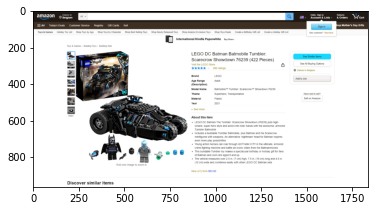

In [10]:
img = remove_scrollbar(cv.imread(images_dir[0]))
plt.imshow(img)

Dataset creation with selected features

In [11]:
# data set preparation
import csv

# writes to a new csv or an over-write to existing one
csv_name = '../dataset.csv'

with open(csv_name, 'w') as csv_file:
    fieldnames = get_fieldnames()
    print('Length of fields including features :', len(fieldnames))

    writer=csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    for idx, image_path in enumerate(images_dir):
        # get target(label) and metadata(file_name)
        label = image_path.split('\\')[1] # ex: google
        file_name = image_path.split('\\')[2] # ex: google43985.png
        
        # preprocessing
        image = remove_scrollbar(cv.imread(image_path))
        # feature extraction
        fd = get_feature_vector(image)
                
        # forming new row
        new_row = get_row(file_name, label, fd)
        
        writer.writerow(new_row)

        # print execution info
        print(idx, '/', len(images_dir))


Length of fields including features : 8822
0 / 2590
1 / 2590
2 / 2590
3 / 2590
4 / 2590
5 / 2590
6 / 2590
7 / 2590
8 / 2590
9 / 2590
10 / 2590
11 / 2590
12 / 2590
13 / 2590
14 / 2590
15 / 2590
16 / 2590
17 / 2590
18 / 2590
19 / 2590
20 / 2590
21 / 2590
22 / 2590
23 / 2590
24 / 2590
25 / 2590
26 / 2590
27 / 2590
28 / 2590
29 / 2590
30 / 2590
31 / 2590
32 / 2590
33 / 2590
34 / 2590
35 / 2590
36 / 2590
37 / 2590
38 / 2590
39 / 2590
40 / 2590
41 / 2590
42 / 2590
43 / 2590
44 / 2590
45 / 2590
46 / 2590
47 / 2590
48 / 2590
49 / 2590
50 / 2590
51 / 2590
52 / 2590
53 / 2590
54 / 2590
55 / 2590
56 / 2590
57 / 2590
58 / 2590
59 / 2590
60 / 2590
61 / 2590
62 / 2590
63 / 2590
64 / 2590
65 / 2590
66 / 2590
67 / 2590
68 / 2590
69 / 2590
70 / 2590
71 / 2590
72 / 2590
73 / 2590
74 / 2590
75 / 2590
76 / 2590
77 / 2590
78 / 2590
79 / 2590
80 / 2590
81 / 2590
82 / 2590
83 / 2590
84 / 2590
85 / 2590
86 / 2590
87 / 2590
88 / 2590
89 / 2590
90 / 2590
91 / 2590
92 / 2590
93 / 2590
94 / 2590
95 / 2590
96 / 25